Import

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
import joblib
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.models import load_model

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
missing_values = ['8888']

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Dataset_Curah_Hujan.xlsx', na_values = missing_values)
df

,Tanggal,RR
0,01-01-2019,NaN
1,02-01-2019,0.0
2,03-01-2019,20.5
3,04-01-2019,2.6
4,05-01-2019,0.9
...,...,...
1699,27-08-2023,0.0
1700,28-08-2023,0.0
1701,29-08-2023,0.0
1702,30-08-2023,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1704 non-null   object 
 1   RR       1426 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [6]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')

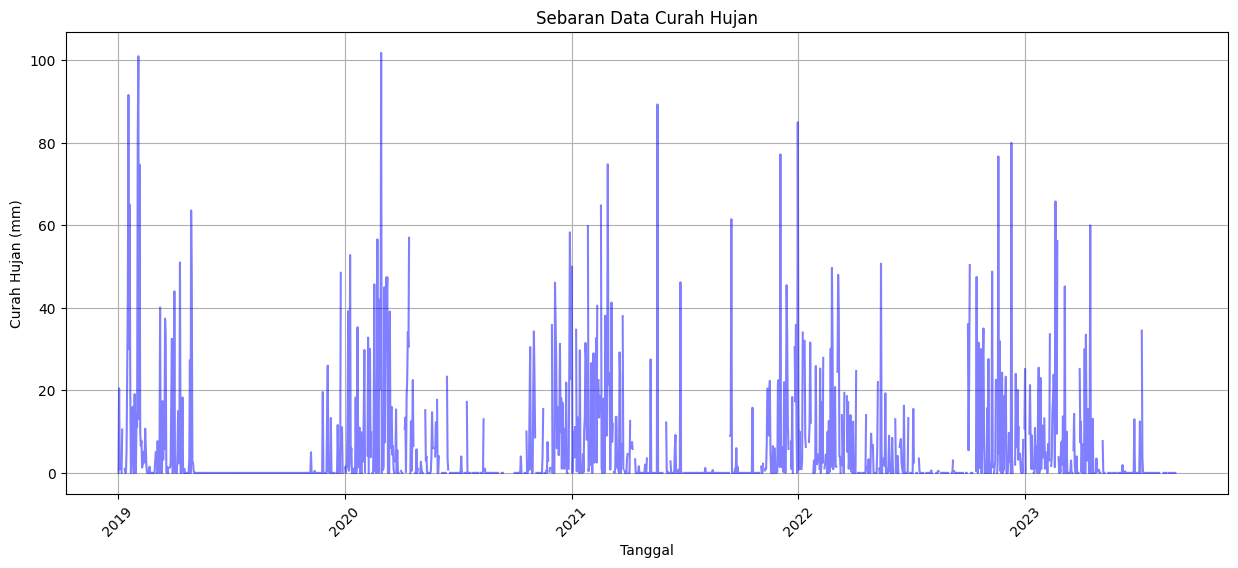

In [7]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(df['Tanggal'], df['RR'], linestyle='-', color='blue', alpha=0.5)
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

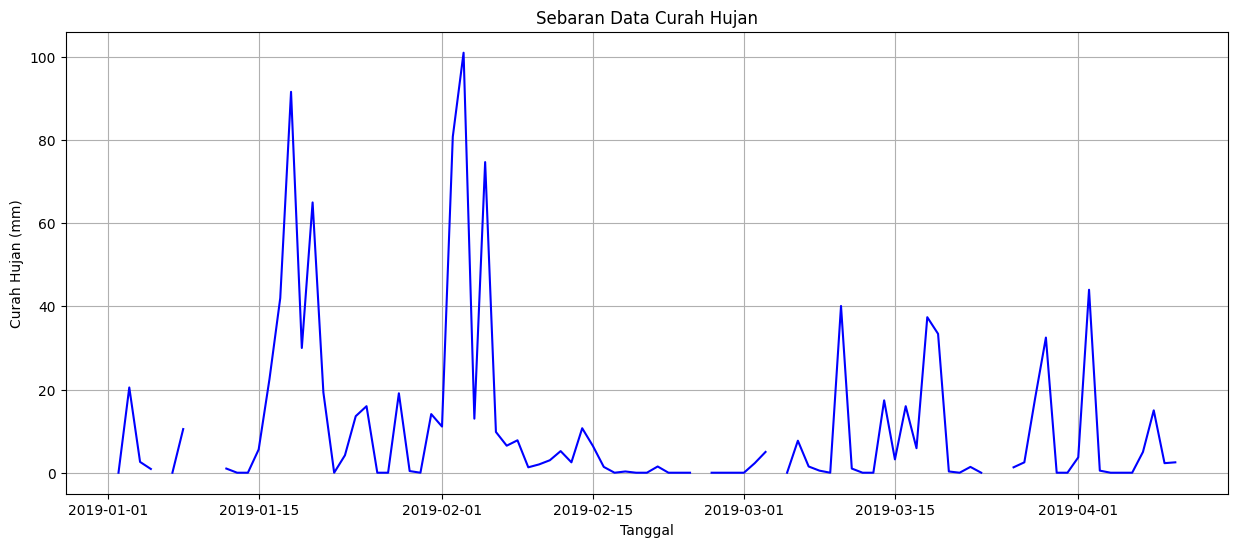

In [8]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(df['Tanggal'].head(100), df['RR'].head(100), linestyle='-', color='blue')
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.show()

In [9]:
df_1 = df.copy()
df_1

,Tanggal,RR
0,2019-01-01,NaN
1,2019-01-02,0.0
2,2019-01-03,20.5
3,2019-01-04,2.6
4,2019-01-05,0.9
...,...,...
1699,2023-08-27,0.0
1700,2023-08-28,0.0
1701,2023-08-29,0.0
1702,2023-08-30,0.0


In [10]:
df_1.isnull().sum()

Tanggal      0
RR         278
dtype: int64

In [11]:
#fitur rating yang akan diimputasi
fitur_imputasi = ['RR']
preprocessing = KNNImputer(n_neighbors=4)

#imputasi pada dataset
data_imputasi = preprocessing.fit_transform(df[fitur_imputasi])

#mengkonversi hasil imputasai menjadi data frame
data_imputasi_df = pd.DataFrame(data_imputasi, columns=fitur_imputasi)

#menggabungkan data imputasi dengan dataset asli
data_imputasi_df = df.drop(fitur_imputasi, axis=1).join(data_imputasi_df)

#menyimpan dataset yang telah diimputasi ke file csv
data_imputasi_df.to_csv('dataset_imputasi.csv', index=True)
data_imputasi_df

,Tanggal,RR
0,2019-01-01,5.923072
1,2019-01-02,0.000000
2,2019-01-03,20.500000
3,2019-01-04,2.600000
4,2019-01-05,0.900000
...,...,...
1699,2023-08-27,0.000000
1700,2023-08-28,0.000000
1701,2023-08-29,0.000000
1702,2023-08-30,0.000000


In [12]:
data_imputasi_df.isnull().sum()

Tanggal    0
RR         0
dtype: int64

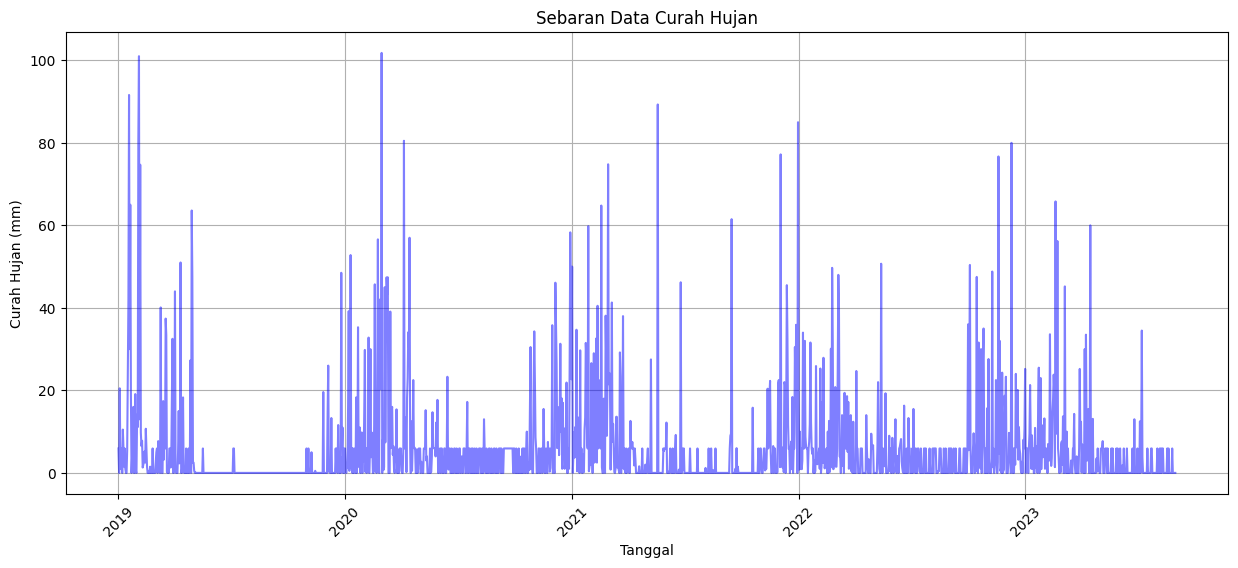

In [13]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(data_imputasi_df['Tanggal'], data_imputasi_df['RR'], linestyle='-', color='blue', alpha=0.5)
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

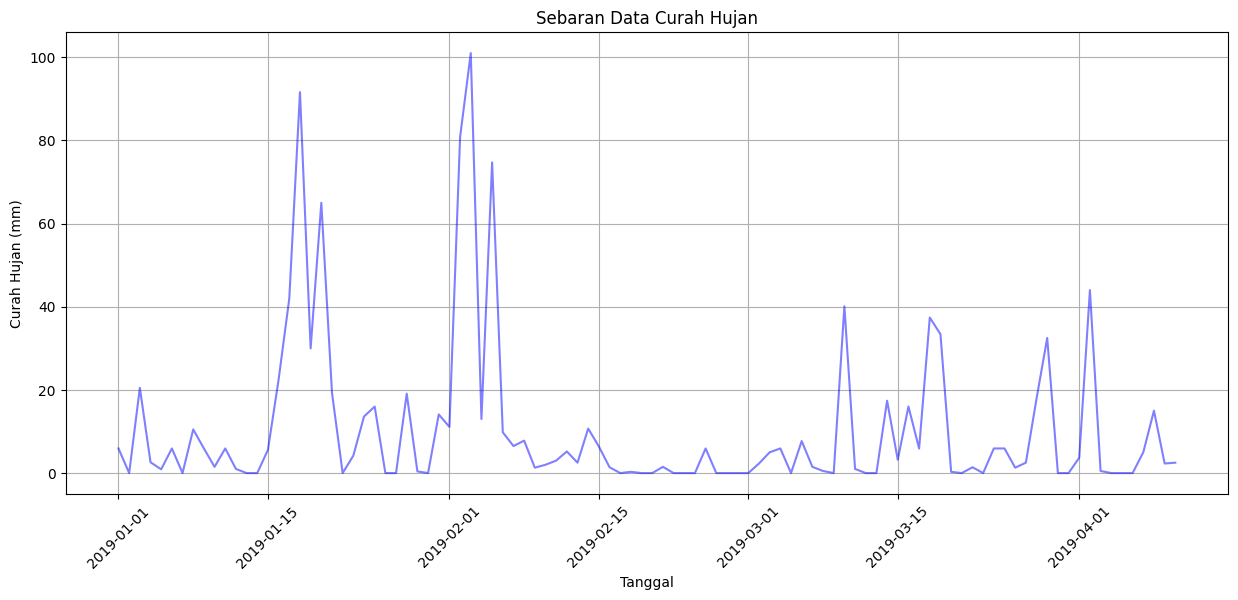

In [14]:
import matplotlib.pyplot as plt


# Plot scatter plot
plt.figure(figsize=(15, 6))
plt.plot(data_imputasi_df['Tanggal'].head(100), data_imputasi_df['RR'].head(100), linestyle='-', color='blue', alpha=0.5)
plt.title('Sebaran Data Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
df_2 = data_imputasi_df.copy().drop(columns=['Tanggal'])
df_2

,RR
0,5.923072
1,0.000000
2,20.500000
3,2.600000
4,0.900000
...,...
1699,0.000000
1700,0.000000
1701,0.000000
1702,0.000000


In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_2)
scaled_data

array([[0.05818341],
       [0.        ],
       [0.20137525],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [17]:
values = df_2.values
training_data_len = math.ceil(len(values)* 0.7)
train_data = scaled_data[0: training_data_len , :]

x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1143, 50, 1)

In [18]:
scaled_data.shape

(1704, 1)

In [19]:
test_data = scaled_data[training_data_len-50: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(50, len(test_data)):
  x_test.append(test_data[i-50:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(511, 50, 1)

In [20]:
# Menyimpan data train dan data testing
x_train_df = pd.DataFrame({'x_train': x_train.flatten()})
x_train_df.to_csv('x_train_knn_s2.csv', index=False)
y_train_df = pd.DataFrame({'y_train': y_train.flatten()})
y_train_df.to_csv('y_train_knn_s2.csv', index=False)
x_test_df = pd.DataFrame({'x_test': x_test.flatten()})
x_test_df.to_csv('x_test_knn_s2.csv', index=False)
y_test_df = pd.DataFrame({'y_test': y_test.flatten()})
y_test_df.to_csv('y_test_knn_s2.csv', index=False)

In [21]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.65))
model.add(layers.LSTM(100, return_sequences=False))
model.add(Dropout(0.65))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 12375

In [22]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size= 32, epochs=25, verbose=1)

Epoch 1/25
36/36 [==============================] - 8s 81ms/step - loss: 0.0130
Epoch 2/25
36/36 [==============================] - 4s 99ms/step - loss: 0.0126
Epoch 3/25
36/36 [==============================] - 4s 119ms/step - loss: 0.0123
Epoch 4/25
36/36 [==============================] - 4s 102ms/step - loss: 0.0127
Epoch 5/25
36/36 [==============================] - 3s 83ms/step - loss: 0.0124
Epoch 6/25
36/36 [==============================] - 3s 84ms/step - loss: 0.0126
Epoch 7/25
36/36 [==============================] - 3s 91ms/step - loss: 0.0122
Epoch 8/25
36/36 [==============================] - 4s 122ms/step - loss: 0.0126
Epoch 9/25
36/36 [==============================] - 3s 76ms/step - loss: 0.0122
Epoch 10/25
36/36 [==============================] - 3s 78ms/step - loss: 0.0122
Epoch 11/25
36/36 [==============================] - 3s 74ms/step - loss: 0.0122
Epoch 12/25
36/36 [==============================] - 3s 88ms/step - loss: 0.0122
Epoch 13/25
36/36 [===============

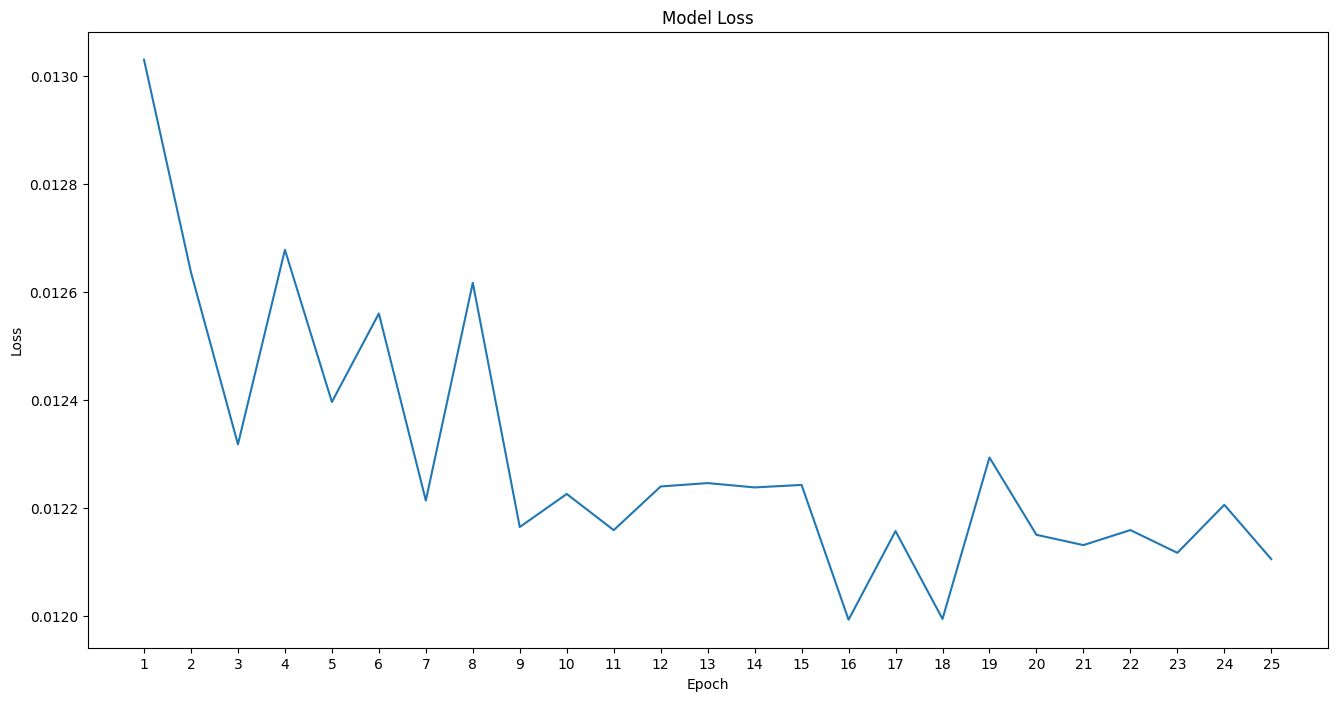

In [23]:
# Plot loss per epoch
plt.figure(figsize=(16,8))
epochs = np.arange(1, len(history.history['loss']) + 1)  # Membuat array yang berisi jumlah epoch
plt.plot(epochs, history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(epochs)  # Mengatur label sumbu x menjadi jumlah epoch
plt.show()

In [24]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

16/16 [==============================] - 1s 29ms/step


0.3525573475382473

In [25]:
# Membuat DataFrame
data_df = pd.DataFrame({
    'Tanggal': df_1['Tanggal'][1193: ].values,
    'Curah_Hujan': df_2['RR'][1193: ].values,
    'Prediksi_Curah_Hujan': predictions.flatten()  # Pastikan hasil prediksi memiliki dimensi satu
})
data_df.to_csv('dataset&prediksi.csv', index=True)
data_df

,Tanggal,Curah_Hujan,Prediksi_Curah_Hujan
0,2022-04-08,0.000000,5.351542
1,2022-04-09,0.000000,4.974322
2,2022-04-10,0.000000,4.581070
3,2022-04-11,5.923072,4.217911
4,2022-04-12,5.923072,4.172199
...,...,...,...
506,2023-08-27,0.000000,2.940485
507,2023-08-28,0.000000,2.950243
508,2023-08-29,0.000000,2.886171
509,2023-08-30,0.000000,2.796731


In [26]:
n = 1  # Example: Predict the next 10 time steps
future_predictions = []
x_last_window = x_test[-25]  # Menggunakan bagian terakhir dari data testing sebagai x_last_window
last_window = x_last_window.reshape((1, x_last_window.shape[0], x_last_window.shape[1]))

for _ in range(n):
    # Predict the next time step
    prediction = model.predict(last_window)

    # Append the prediction to the list of future predictions
    future_predictions.append(prediction[0])

    # Update the last window by removing the first element and appending the prediction
    last_window = np.append(last_window[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Convert the list of future predictions to a numpy array
future_predictions = np.array(future_predictions)
print('future_predictions : ', future_predictions)

# Inverse transform predictions to get the original scale
future_predictions_denormalisasi = scaler.inverse_transform(future_predictions)
print('future_predictions_denormalisasi : ', future_predictions_denormalisasi)

1/1 [==============================] - 0s 46ms/step
future_predictions :  [[0.0284163]]
future_predictions_denormalisasi :  [[2.8927796]]


<ipython-input-27-65b5182c9f66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


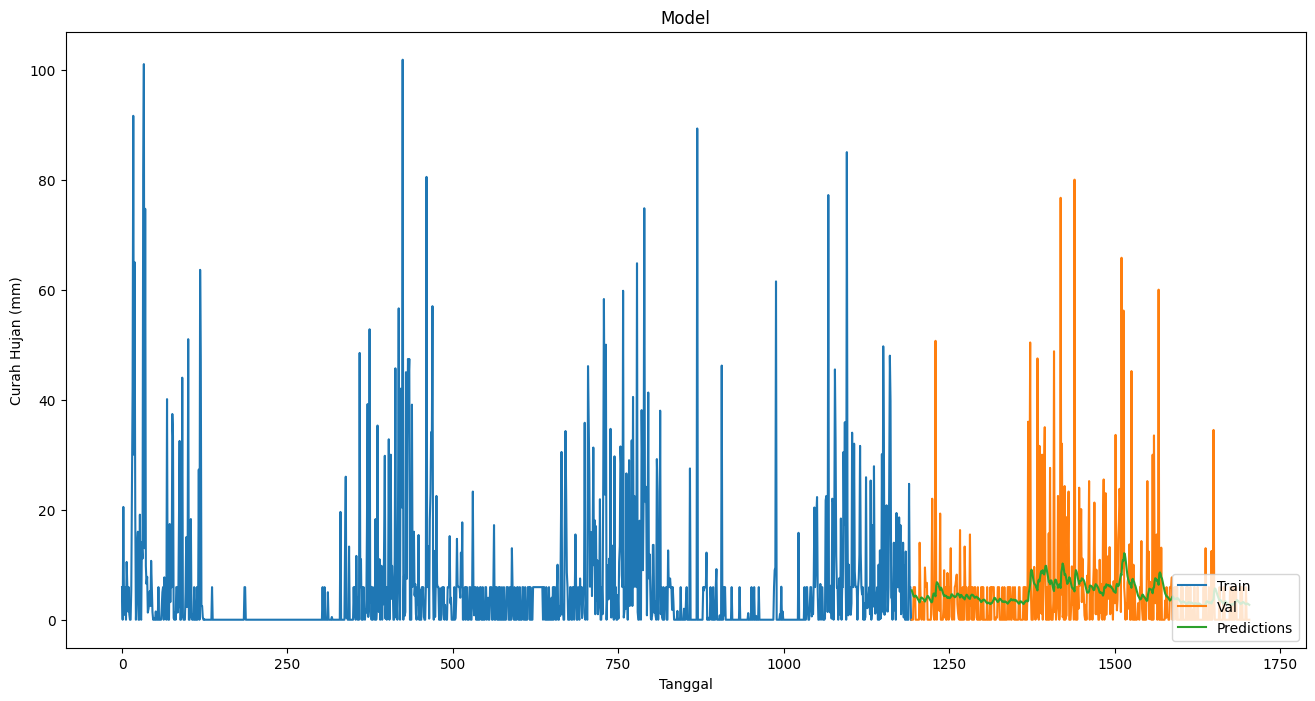

In [27]:
data = df_2.filter(['RR'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.plot(train)
plt.plot(validation[['RR', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

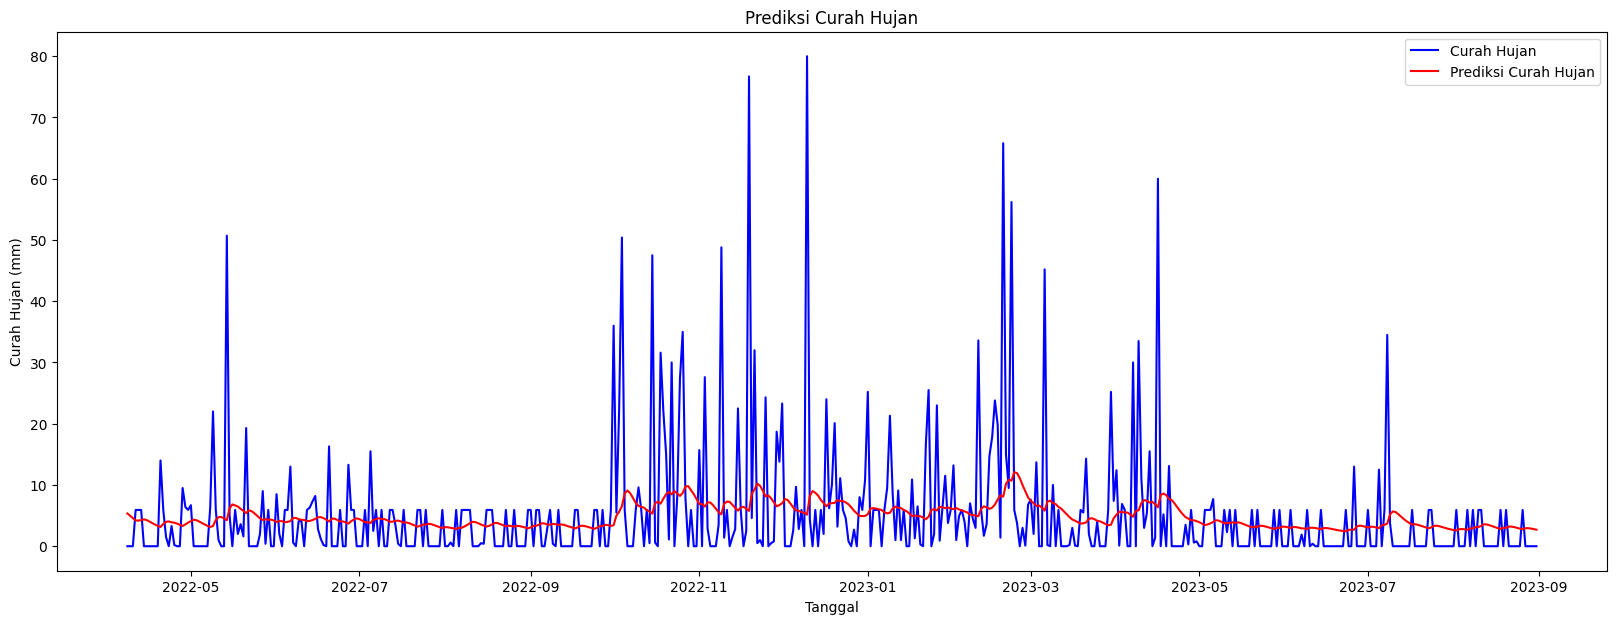

In [28]:
#Memvisualisasikan hasil prediksi
plt.figure(figsize=(20,7))
plt.plot(df_1['Tanggal'].values[1193:], values[1193:], color = 'blue', label = 'Curah Hujan')
plt.plot(df_1['Tanggal'][-predictions.shape[0]:].values, predictions, color = 'red', label = 'Prediksi Curah Hujan')
plt.title('Prediksi Curah Hujan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.show()

In [29]:
# Save the model
model.save("model_lstm_knn_s2.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
